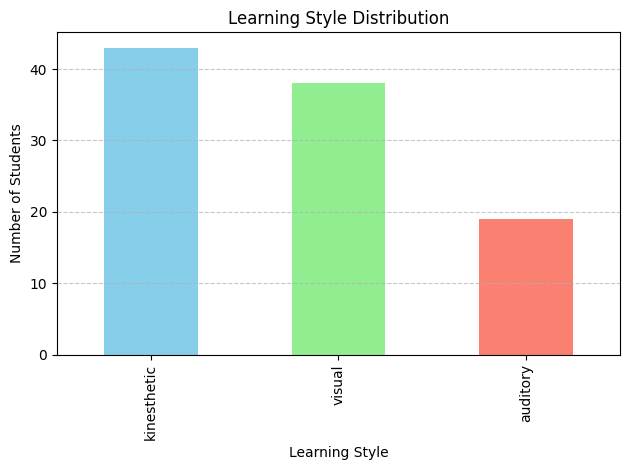

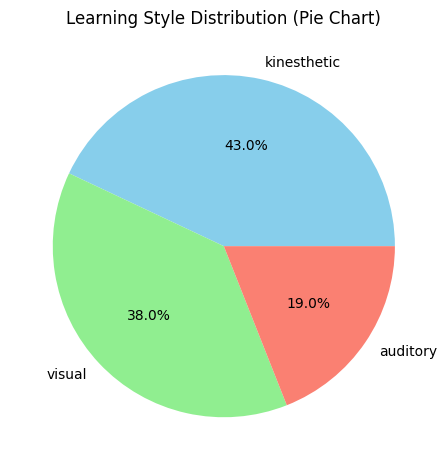

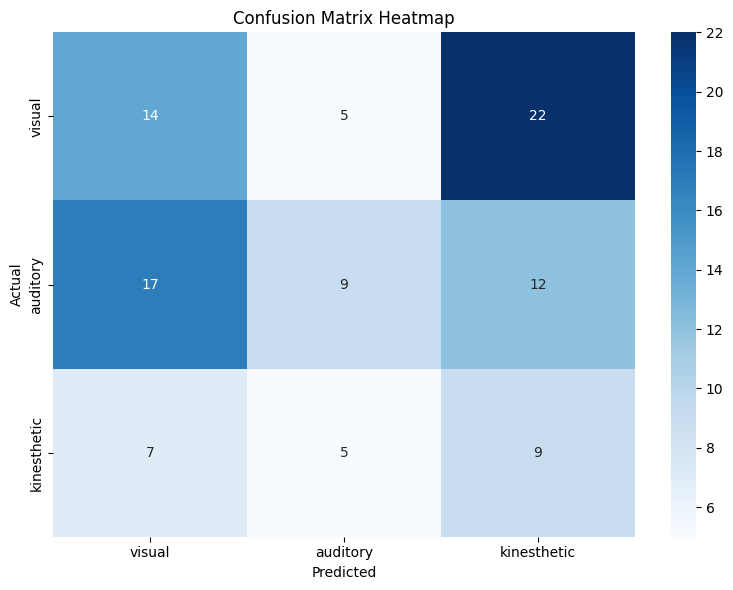

Accuracy: 0.32
Precision (weighted): 0.38
Recall (weighted): 0.32


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load dataset
df = pd.read_csv('student_methods.csv')

# Function to determine dominant learning style
def determine_learning_style(row):
    scores = {
        'visual': row['visual_score'],
        'auditory': row['auditory_score'],
        'kinesthetic': row['kinesthetic_score']
    }
    return max(scores, key=scores.get)

# Classify each student
df['predicted_learning_style'] = df.apply(determine_learning_style, axis=1)

# Count classifications
style_counts = df['predicted_learning_style'].value_counts()

# Bar chart
style_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Learning Style Distribution')
plt.xlabel('Learning Style')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie chart
style_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Learning Style Distribution (Pie Chart)')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Actual learning style (true labels)
y_true = df['learning_style']  # Actual values from the 'learning_style' column
y_pred = df['predicted_learning_style']  # Predicted values

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['visual', 'auditory', 'kinesthetic'])

# Plot heatmap of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['visual', 'auditory', 'kinesthetic'], yticklabels=['visual', 'auditory', 'kinesthetic'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', labels=['visual', 'auditory', 'kinesthetic'])
recall = recall_score(y_true, y_pred, average='weighted', labels=['visual', 'auditory', 'kinesthetic'])

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (weighted): {precision:.2f}')
print(f'Recall (weighted): {recall:.2f}')
